In [1]:
import pandas as pd
import datetime
#from google.colab import drive
# Read CSV file into DataFrame df
data = pd.read_csv('sp500_stocks.csv')
#drive.mount('/content/drive', force_remount=True)
#data = pd.read_csv("https://drive.google.com/file/d/1mEQo3VhYPNFbZCQyHDn4H98mhVH6meMS/view?usp=sharing", index_col = 0, error_bad_lines=False)
data.head()
# Show dataframe
df = (data.pipe(lambda x: x.assign(year = pd.to_datetime(x.Date).dt.year))[['Symbol', 'Date', 'year', 'Open', 'High','Close','Low','Adj Close','Volume']])
df.head()


,Symbol,Date,year,Open,High,Close,Low,Adj Close,Volume
0,A,2018-01-02,2018,67.419998,67.889999,67.599998,67.339996,65.523422,1047800.0
1,A,2018-01-03,2018,67.620003,69.489998,69.320000,67.599998,67.190582,1698900.0
2,A,2018-01-04,2018,69.540001,69.820000,68.800003,68.779999,66.686562,2230700.0
3,A,2018-01-05,2018,68.730003,70.099998,69.900002,68.730003,67.752769,1632500.0
4,A,2018-01-08,2018,69.730003,70.330002,70.050003,69.550003,67.898155,1613400.0


In [2]:
#first factor to be overall stock market movements
# !pip3 install yfinance
import bs4 as bs
import requests
import yfinance as yf
import datetime

spy_df = yf.download('SPY', start='2018-01-01', end='2022-08-31')
spy_df.to_csv('sp500.csv')
data2 = pd.read_csv('sp500.csv')
data2.head()
df2 = (data2.pipe(lambda x: x.assign(year = pd.to_datetime(x.Date).dt.year))[['Date', 'year', 'Open', 'High','Low','Close','Adj Close','Volume']])
#df2.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'},inplace = True)
df2.insert(0,'Symbol','SPY')
df2['overall_return'] = (df2['Close'].pct_change())*100
mean = df2['overall_return'].mean()
df2['overall_return'].fillna(value=mean, inplace=True)
df2.head()


[*********************100%***********************]  1 of 1 completed


,Symbol,Date,year,Open,High,Low,Close,Adj Close,Volume,overall_return
0,SPY,2018-01-02,2018,267.839996,268.809998,267.399994,268.769989,247.899811,86655700,0.042635
1,SPY,2018-01-03,2018,268.959991,270.640015,268.959991,270.470001,249.467773,90070400,0.632516
2,SPY,2018-01-04,2018,271.200012,272.160004,270.540009,271.609985,250.519302,80636400,0.421483
3,SPY,2018-01-05,2018,272.510010,273.559998,271.950012,273.420013,252.188705,83524000,0.666407
4,SPY,2018-01-08,2018,273.309998,274.100006,272.980011,273.920013,252.649902,57319200,0.182869


In [3]:
#Beta calculation
import numpy as np
df['stock_market_return'] = (df['Close'].pct_change())*100
mean = df['stock_market_return'].mean()
df['stock_market_return'].fillna(value=mean, inplace=True)
df.head()

#beta = (covariance/variance)


,Symbol,Date,year,Open,High,Close,Low,Adj Close,Volume,stock_market_return
0,A,2018-01-02,2018,67.419998,67.889999,67.599998,67.339996,65.523422,1047800.0,0.093174
1,A,2018-01-03,2018,67.620003,69.489998,69.320000,67.599998,67.190582,1698900.0,2.544381
2,A,2018-01-04,2018,69.540001,69.820000,68.800003,68.779999,66.686562,2230700.0,-0.750139
3,A,2018-01-05,2018,68.730003,70.099998,69.900002,68.730003,67.752769,1632500.0,1.598835
4,A,2018-01-08,2018,69.730003,70.330002,70.050003,69.550003,67.898155,1613400.0,0.214594


In [4]:
merged_inner = pd.merge(left=df, right=df2, left_on='Date', right_on='Date')
merged_inner.head()

,Symbol_x,Date,year_x,Open_x,High_x,Close_x,Low_x,Adj Close_x,Volume_x,stock_market_return,Symbol_y,year_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,overall_return
0,A,2018-01-02,2018,67.419998,67.889999,67.599998,67.339996,65.523422,1047800.0,0.093174,SPY,2018,267.839996,268.809998,267.399994,268.769989,247.899811,86655700,0.042635
1,AAL,2018-01-02,2018,52.330002,53.099998,52.990002,51.900002,51.647556,4084700.0,-58.691922,SPY,2018,267.839996,268.809998,267.399994,268.769989,247.899811,86655700,0.042635
2,AAP,2018-01-02,2018,100.900002,107.930000,106.089996,99.709999,103.141106,2624500.0,695.873946,SPY,2018,267.839996,268.809998,267.399994,268.769989,247.899811,86655700,0.042635
3,AAPL,2018-01-02,2018,42.540001,43.075001,43.064999,42.314999,41.310070,102223600.0,-74.737491,SPY,2018,267.839996,268.809998,267.399994,268.769989,247.899811,86655700,0.042635
4,ABBV,2018-01-02,2018,97.139999,98.900002,98.410004,96.750000,79.061188,4561300.0,-38.071864,SPY,2018,267.839996,268.809998,267.399994,268.769989,247.899811,86655700,0.042635


In [5]:
merged_inner = merged_inner.drop(['Adj Close_y'], axis=1)
merged_inner.head()

,Symbol_x,Date,year_x,Open_x,High_x,Close_x,Low_x,Adj Close_x,Volume_x,stock_market_return,Symbol_y,year_y,Open_y,High_y,Low_y,Close_y,Volume_y,overall_return
0,A,2018-01-02,2018,67.419998,67.889999,67.599998,67.339996,65.523422,1047800.0,0.093174,SPY,2018,267.839996,268.809998,267.399994,268.769989,86655700,0.042635
1,AAL,2018-01-02,2018,52.330002,53.099998,52.990002,51.900002,51.647556,4084700.0,-58.691922,SPY,2018,267.839996,268.809998,267.399994,268.769989,86655700,0.042635
2,AAP,2018-01-02,2018,100.900002,107.930000,106.089996,99.709999,103.141106,2624500.0,695.873946,SPY,2018,267.839996,268.809998,267.399994,268.769989,86655700,0.042635
3,AAPL,2018-01-02,2018,42.540001,43.075001,43.064999,42.314999,41.310070,102223600.0,-74.737491,SPY,2018,267.839996,268.809998,267.399994,268.769989,86655700,0.042635
4,ABBV,2018-01-02,2018,97.139999,98.900002,98.410004,96.750000,79.061188,4561300.0,-38.071864,SPY,2018,267.839996,268.809998,267.399994,268.769989,86655700,0.042635


In [6]:
#Beta = Covariance(Stock Returns, Market Returns) / Variance(Market Returns)
mean_a = merged_inner['overall_return'].mean()
mean_b = merged_inner['stock_market_return'].mean()
merged_inner['covariance'] = (merged_inner['overall_return']-mean_a)*(merged_inner['stock_market_return']-mean_b)
merged_inner.head()

merged_inner['Variance'] = merged_inner['overall_return'].var()
merged_inner.head()
merged_inner['beta'] = merged_inner['covariance']/merged_inner['Variance'] 
merged_inner.head()
merged_inner.drop(['Volume_y','Close_y','High_y','Low_y','Open_y','year_y','Symbol_y'] ,axis=1 , inplace=True)
merged_inner.head()

,Symbol_x,Date,year_x,Open_x,High_x,Close_x,Low_x,Adj Close_x,Volume_x,stock_market_return,overall_return,covariance,Variance,beta
0,A,2018-01-02,2018,67.419998,67.889999,67.599998,67.339996,65.523422,1047800.0,0.093174,0.042635,2.027087e-19,1.811398,1.119073e-19
1,AAL,2018-01-02,2018,52.330002,53.099998,52.990002,51.900002,51.647556,4084700.0,-58.691922,0.042635,6.924648e-03,1.811398,3.822820e-03
2,AAP,2018-01-02,2018,100.900002,107.930000,106.089996,99.709999,103.141106,2624500.0,695.873946,0.042635,-8.196018e-02,1.811398,-4.524692e-02
3,AAPL,2018-01-02,2018,42.540001,43.075001,43.064999,42.314999,41.310070,102223600.0,-74.737491,0.042635,8.814752e-03,1.811398,4.866270e-03
4,ABBV,2018-01-02,2018,97.139999,98.900002,98.410004,96.750000,79.061188,4561300.0,-38.071864,0.042635,4.495688e-03,1.811398,2.481889e-03


In [7]:
adf_df = merged_inner[['Symbol_x','Date','Close_x']]
adf_df.head()

,Symbol_x,Date,Close_x
0,A,2018-01-02,67.599998
1,AAL,2018-01-02,52.990002
2,AAP,2018-01-02,106.089996
3,AAPL,2018-01-02,43.064999
4,ABBV,2018-01-02,98.410004


In [8]:
data = pd.read_csv('csv_data.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Columns: 502 entries, Date to ZTS
dtypes: float64(501), object(1)
memory usage: 4.5+ MB


In [10]:
data.isnull().values.any()

True

In [11]:
data.columns[data.isnull().any()]

Index(['CARR', 'CDAY', 'CEG', 'CTVA', 'DOW', 'FOX', 'FOXA', 'MRNA', 'OGN',
       'OTIS'],
      dtype='object')

In [12]:
data

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,02-01-2018,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,192.490005,58.790001,153.839996,...,164.300003,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997
1,03-01-2018,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,195.820007,58.919998,154.550003,...,162.520004,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998
2,04-01-2018,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,199.250000,58.820000,156.380005,...,163.399994,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999
3,05-01-2018,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,202.320007,58.990002,157.669998,...,164.490005,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001
4,08-01-2018,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,207.800003,58.820000,158.929993,...,162.300003,47.139999,87.139999,68.300003,69.480003,82.980003,122.543686,110.629997,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,24-08-2022,133.669998,13.990000,179.910004,167.529999,137.910004,148.229996,268.040008,105.440002,306.260010,...,62.820000,75.410004,98.580002,34.360001,96.129997,114.669998,109.699997,319.339996,56.279999,162.630005
1170,25-08-2022,136.009995,14.420000,180.990005,170.029999,139.330002,150.419998,274.450012,105.889999,309.769989,...,64.949997,76.080002,99.089996,34.759998,97.550003,116.820000,111.940002,330.140015,57.310001,165.529999
1171,26-08-2022,129.869995,13.740000,173.589996,163.619995,136.350006,146.190002,258.119995,101.900002,298.130005,...,62.330002,74.930000,97.870003,33.610001,92.970001,112.160004,107.510002,308.160004,56.439999,159.889999
1172,29-08-2022,128.110001,13.510000,170.539993,161.380005,135.710007,147.490005,256.980011,101.839996,295.140015,...,62.410000,75.620003,100.120003,33.080002,92.050003,112.209999,107.620003,307.899994,55.750000,157.869995


In [13]:
data.drop(['CARR', 'CDAY', 'CEG', 'CTVA', 'DOW', 'FOX', 'FOXA', 'MRNA', 'OGN','OTIS'],axis=1, inplace=True)

In [14]:
data.isnull().sum().sum()

0

In [15]:
data.set_index('Date', inplace=True)
data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
02-01-2018,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,192.490005,58.790001,153.839996,177.699997,...,164.300003,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997
03-01-2018,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,195.820007,58.919998,154.550003,181.039993,...,162.520004,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998
04-01-2018,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,199.250000,58.820000,156.380005,183.220001,...,163.399994,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999
05-01-2018,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,202.320007,58.990002,157.669998,185.339996,...,164.490005,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001
08-01-2018,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,207.800003,58.820000,158.929993,185.039993,...,162.300003,47.139999,87.139999,68.300003,69.480003,82.980003,122.543686,110.629997,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-08-2022,133.669998,13.990000,179.910004,167.529999,137.910004,148.229996,268.040008,105.440002,306.260010,405.649994,...,62.820000,75.410004,98.580002,34.360001,96.129997,114.669998,109.699997,319.339996,56.279999,162.630005
25-08-2022,136.009995,14.420000,180.990005,170.029999,139.330002,150.419998,274.450012,105.889999,309.769989,403.929993,...,64.949997,76.080002,99.089996,34.759998,97.550003,116.820000,111.940002,330.140015,57.310001,165.529999
26-08-2022,129.869995,13.740000,173.589996,163.619995,136.350006,146.190002,258.119995,101.900002,298.130005,381.019989,...,62.330002,74.930000,97.870003,33.610001,92.970001,112.160004,107.510002,308.160004,56.439999,159.889999


In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_statistics(time_series):
    """
    Augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(time_series)
    if result[1] < 0.0500:             # result[1] contains the p-value
        return 0                       # returns 0 value if p-value of test is under 5%
    else:
        return 1

In [17]:
def adf_tests(df):
    """
    Augmented Dickey-Fuller test applied to every column in DataFrame
results = df.apply(adf_statistics, axis=0) # Output is a Pandas series
    """
    results = df.apply(adf_statistics) # Output is a Pandas series
    if sum(results)==0:
        print('Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%')
    else:
        for i, v in results.items():
            if v == 1:
                print(f'Null hypothesis of non-stationarity of {i} series is NOT rejected')
            else:
                print(f'Null hypothesis of non-stationarity of {i} series is rejected')  

In [18]:
adf_tests(data)

Null hypothesis of non-stationarity of A series is NOT rejected
Null hypothesis of non-stationarity of AAL series is NOT rejected
Null hypothesis of non-stationarity of AAP series is NOT rejected
Null hypothesis of non-stationarity of AAPL series is NOT rejected
Null hypothesis of non-stationarity of ABBV series is NOT rejected
Null hypothesis of non-stationarity of ABC series is NOT rejected
Null hypothesis of non-stationarity of ABMD series is NOT rejected
Null hypothesis of non-stationarity of ABT series is NOT rejected
Null hypothesis of non-stationarity of ACN series is NOT rejected
Null hypothesis of non-stationarity of ADBE series is NOT rejected
Null hypothesis of non-stationarity of ADI series is NOT rejected
Null hypothesis of non-stationarity of ADM series is NOT rejected
Null hypothesis of non-stationarity of ADP series is NOT rejected
Null hypothesis of non-stationarity of ADSK series is NOT rejected
Null hypothesis of non-stationarity of AEE series is NOT rejected
Null hy

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 02-01-2018 to 30-08-2022
Columns: 491 entries, A to ZTS
dtypes: float64(491)
memory usage: 4.4+ MB


In [20]:
def transform1(column):
    """
    Log first difference multiplied by 100 transformation (i.e. approximate percent change)
    """
    column = np.log(column).diff() * 100       
    return column

In [21]:
data1 = data.apply(transform1, axis=0)

In [22]:
def transform2(column):
    """
    First difference multiplied by 100 transformation
    """
    column = column.diff() * 100       
    return column

In [23]:
def remove_outliers(df):
    """
    Remove outliers (setting their value to missing), defined as observations that are more than 5X 
    the interquartile range from the series mean
    """    
    # Compute the mean and interquartile range
    mean = df.mean()
    iqr = df.quantile([0.25, 0.75]).diff().T.iloc[:, 1]
    
    # Replace entries that are more than 10 times the IQR
    # away from the mean with NaN (denotes a missing entry)
    mask = np.abs(df) > mean + 5 * iqr
    treated = df.copy()
    treated[mask] = np.nan

    return treated

In [24]:
data_station = remove_outliers(data)

In [25]:
data_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 02-01-2018 to 30-08-2022
Columns: 491 entries, A to ZTS
dtypes: float64(491)
memory usage: 4.4+ MB


In [26]:
endog_dj = data_station.reset_index(drop=True)
endog_dj

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,192.490005,58.790001,153.839996,177.699997,...,164.300003,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997
1,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,195.820007,58.919998,154.550003,181.039993,...,162.520004,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998
2,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,199.250000,58.820000,156.380005,183.220001,...,163.399994,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999
3,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,202.320007,58.990002,157.669998,185.339996,...,164.490005,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001
4,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,207.800003,58.820000,158.929993,185.039993,...,162.300003,47.139999,87.139999,68.300003,69.480003,82.980003,122.543686,110.629997,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,133.669998,13.990000,179.910004,167.529999,137.910004,148.229996,268.040008,105.440002,306.260010,405.649994,...,62.820000,75.410004,98.580002,34.360001,96.129997,114.669998,109.699997,319.339996,56.279999,162.630005
1170,136.009995,14.420000,180.990005,170.029999,139.330002,150.419998,274.450012,105.889999,309.769989,403.929993,...,64.949997,76.080002,99.089996,34.759998,97.550003,116.820000,111.940002,330.140015,57.310001,165.529999
1171,129.869995,13.740000,173.589996,163.619995,136.350006,146.190002,258.119995,101.900002,298.130005,381.019989,...,62.330002,74.930000,97.870003,33.610001,92.970001,112.160004,107.510002,308.160004,56.439999,159.889999
1172,128.110001,13.510000,170.539993,161.380005,135.710007,147.490005,256.980011,101.839996,295.140015,375.260010,...,62.410000,75.620003,100.120003,33.080002,92.050003,112.209999,107.620003,307.899994,55.750000,157.869995


In [27]:
endog_dj1 = endog_dj.iloc[:, :100]
endog_dj2 = endog_dj.iloc[:, 101:200]
endog_dj3 = endog_dj.iloc[:, 201:300]
endog_dj4 = endog_dj.iloc[:,301:400]
endog_dj5 = endog_dj.iloc[:, 401:491]

# endog_dj1.to_csv('endog_dj2.csv')
endog_dj2.to_csv('endog_dj2.csv')
endog_dj3.to_csv('endog_dj3.csv')
endog_dj4.to_csv('endog_dj4.csv')
endog_dj5.to_csv('endog_dj5.csv')
# endog_dj1

In [28]:
import statsmodels.api as sm
factors = ['factor01', 'factor02', 'factor03']
factor_orders = 8
model1 = sm.tsa.DynamicFactorMQ(endog_dj1, factors=factors, factor_orders=factor_orders, standardize=True)
model1.summary()

Model:,Dynamic Factor Model,# of observed variables:,100
,+ 3 factors in 3 blocks,# of factor blocks:,3
,+ AR(1) idiosyncratic,Idiosyncratic disturbances:,AR(1)
Sample:,0,Standardize variables:,True
,- 1174,,
Dep. variable,factor01,factor02,factor03
A,X,X,X
AAL,X,X,X
AAP,X,X,X
AAPL,X,X,X
ABBV,X,X,X


In [29]:
results1 = model1.fit(disp=10)

EM start iterations, llf=1.3595e+05
EM iteration 10, llf=1.3922e+05, convergence criterion=1.0314e-06
EM converged at iteration 11, llf=1.3922e+05, convergence criterion=9.2891e-07 < tolerance=1e-06


In [30]:
results1.summary(display_diagnostics=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Dynamic Factor Results                              
===================================================================================
Dep. Variable:            "A", and 99 more   No. Observations:                 1174
Model:                Dynamic Factor Model   Log Likelihood              139219.986
                   + 3 factors in 3 blocks   AIC                        -277385.971
                     + AR(1) idiosyncratic   BIC                        -274715.045
Date:                     Wed, 12 Oct 2022   HQIC                       -276378.767
Time:                             19:13:39   EM Iterations                       11
Sample:                                  0                                         
                                    - 1174                                         
Covariance Type:              Not computed                                         
                                Observation equation:                                
=====================================================================================
Factor loadings:   factor01   factor02   factor03    idiosyncratic: AR(1)        var.
-------------------------------------------------------------------------------------
               A       0.13      -0.01      -0.03                    0.98        0.00
             AAL      -0.08       0.12      -0.05                    0.97        0.00
             AAP       0.11       0.04       0.01                    0.99        0.01
            AAPL       0.13      -0.02       0.01                    0.99        0.00
            ABBV       0.10       0.07       0.04                    0.99        0.01
             ABC       0.11       0.04       0.05                    0.98        0.00
            ABMD       0.02       0.07      -0.08                    0.99        0.01
             ABT       0.13      -0.04      -0.01                    0.97        0.00
             ACN       0.13       0.00      -0.00                    0.97        0.00
            ADBE       0.12      -0.05      -0.05                    0.97        0.00
             ADI       0.13       0.00      -0.01                    0.95        0.00
             ADM       0.11       0.07       0.06                    0.99        0.00
             ADP       0.12       0.03       0.05                    0.98        0.00
            ADSK       0.11      -0.06      -0.07                    0.97        0.00
             AEE       0.11      -0.04       0.07                    0.95        0.01
             AEP       0.08      -0.04       0.11                    0.98        0.01
             AES       0.12      -0.01      -0.02                    0.99        0.00
             AFL       0.08       0.11       0.04                    0.99        0.00
             AIG       0.04       0.15       0.01                    0.99        0.00
             AIZ       0.12       0.02       0.04                    0.98        0.00
             AJG       0.13       0.01       0.04                    0.99        0.00
            AKAM       0.11      -0.08      -0.01                    0.97        0.01
             ALB       0.11       0.05       0.01                    0.99        0.00
            ALGN       0.10       0.01      -0.11                    0.97        0.00
             ALK      -0.02       0.12      -0.06                    0.99        0.01
             ALL       0.11       0.04       0.02                    0.98        0.01
            ALLE       0.11      -0.03      -0.04                    0.99        0.01
            AMAT       0.13       0.02      -0.03                    0.97        0.00
            AMCR       0.09       0.05      -0.01                    0.97        0.02
             AMD       0.12      -0.03      -0.00                    0.98        0.00
             AME       0.13      -0.00      -0.02                    0.97        0.00
            AMGN  

In [31]:
dj_smoothed1 = results1.factors.smoothed

In [32]:
dj_smoothed1.head()

,factor01,factor02,factor03
0,-9.406310,8.576696,-5.349795
1,-9.243954,8.670555,-5.398609
2,-9.166883,8.847331,-5.429327
3,-9.012697,8.986462,-5.577699
4,-8.915696,8.937111,-5.657080


In [33]:
model2 = sm.tsa.DynamicFactorMQ(endog_dj2, factors=factors, factor_orders=factor_orders, standardize=True)
model2.summary()

Model:,Dynamic Factor Model,# of observed variables:,99
,+ 3 factors in 3 blocks,# of factor blocks:,3
,+ AR(1) idiosyncratic,Idiosyncratic disturbances:,AR(1)
Sample:,0,Standardize variables:,True
,- 1174,,
Dep. variable,factor01,factor02,factor03
COF,X,X,X
COO,X,X,X
COP,X,X,X
COST,X,X,X
CPB,X,X,X


In [ ]:
model3 = sm.tsa.DynamicFactorMQ(endog_dj3, factors=factors, factor_orders=factor_orders, standardize=True)
model3.summary()

In [ ]:
model4 = sm.tsa.DynamicFactorMQ(endog_dj4, factors=factors, factor_orders=factor_orders, standardize=True)
model4.summary()

In [ ]:
model5 = sm.tsa.DynamicFactorMQ(endog_dj5, factors=factors, factor_orders=factor_orders, standardize=True)
model5.summary()

In [35]:
dj_smoothed1.to_csv('dj_smoothed1.csv')

In [ ]:
results5 = model5.fit(disp=10)

In [ ]:
results4 = model4.fit(disp=10)

In [ ]:
results3 = model3.fit(disp=10)


In [ ]:
results2 = model2.fit(disp=10)


In [ ]:
results5.summary(display_diagnostics=True)

In [ ]:
dj_smoothed5 = results5.factors.smoothed
dj_smoothed4 = results4.factors.smoothed
dj_smoothed3 = results3.factors.smoothed
dj_smoothed2 = results2.factors.smoothed


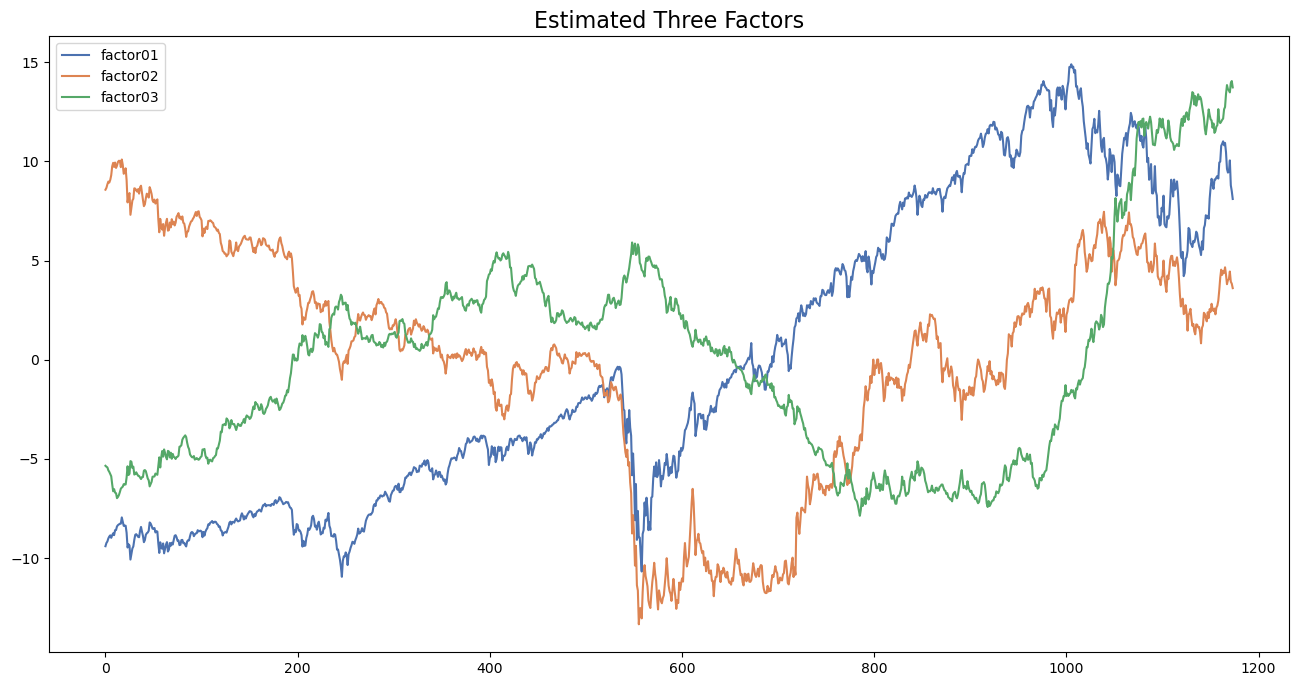

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
with sns.color_palette('deep'):
    fig, ax = plt.subplots(figsize=(16, 8))
    dj_smoothed1.plot(ax=ax)
    
    plt.title('Estimated Three Factors', fontsize=16);